<a href="https://colab.research.google.com/github/karenezhao/s22-pstat160a/blob/main/karenezhao_PythonHW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Homework 1

<b> Instructions:</b> This Python Homework is due on <b> Tuesday, April 12th, at 11:59 p.m.</b> You have to submit your version of this Jupyter Notebook via Gradescope!

In this homework you are supposed to use the random number generater random.random_sample from the numpy package to generate random numbers with three different distributions. 

Recall from the lecture that if $F:\mathbb{R}\rightarrow [0,1]$ is a distribution function with generalized inverse $F^{-1}:[0,1]\rightarrow \mathbb{R}$ and $U$ is a uniform random variable, then $F^{-1}(U)$ is a random variable with distribution function $F$.

Using the function random.random_sample from numpy package write three functions: 
* exponentialRV(seed, mean,n) that returns for given seed a bunch of n random variables from an exponential distribution with the provided mean. Derive the generalized inverse distribution function analytically for your simulation.
* binomial(seed, p,m,n) that returns for given seed a bunch of n Binomial distributed random numbers with the provided success probability p and the number of trial equal to m. You have to numerically calculate the inverse distribution function.
* funnyDiceRV(seed,n) that returns for given seed a bunch of n random number which describe a biased die with distribution $\mathbb{P}(\{1\})=\mathbb{P}(\{2\})=1/6$,$\mathbb{P}(\{3\})=\mathbb{P}(\{4\})=1/4$ and $\mathbb{P}(\{5\})=\mathbb{P}(\{6\})=1/12$.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

Here should come your code for the three functions:

In [2]:
def exponentialRV(seed, mean,n):
    
    ##Here write your own code

    np.random.seed(seed)
    expontialSample = []
    
    for i in range(n):
      u = np.random.random_sample(1) # return random floats in the half-open interval [0.0, 1.0).
      x = -mean*math.log(1-u)
      expontialSample.append(x)
    
    return expontialSample

In [3]:
def binomial(seed, p,m,n):
   
    ##Here write your own code

    np.random.seed(seed)
    binomialSample = []
    
    for i in range(n):
        u = np.random.random_sample(1)  # F(x)

        sum = 0
        for k in range(m):
            pmf = (math.factorial(m)/ (math.factorial(k) * math.factorial(m-k))) * (p**k) * ((1-p)**(m-k))
            if 0<=(sum + pmf) < u:
                sum = sum + pmf
            else:
                binomialSample.append(k)
                break
    
    return binomialSample

In [4]:
def funnyDiceRV(seed, n):
      
    ##Here write your own code

    np.random.seed(seed)
    funnyDiceSample = []
    
    for i in range(n):
      p = np.random.random_sample(1) # float in interval [0, 1]
      if 0 <= p < (1/6):
        r = 1
      elif (1/6) <= p < (1/6)+(1/6):
        r = 2
      elif ((1/6)+(1/6)) <= p < ((1/6)+(1/6)+(1/4)):
        r = 3
      elif ((1/6)+(1/6)+(1/4)) <= p < (1-(1/12)-(1/12)):
        r = 4
      elif (1-(1/12)-(1/12)) <= p < 1-(1/12):
        r = 5
      elif 1-(1/12) <= p < 1:
        r = 6
      funnyDiceSample.append(r)

    return funnyDiceSample

In [5]:
print(exponentialRV(105, 3,5))# You should test all three functions 
print(binomial(105, 0.7,20,5))
print(funnyDiceRV(105, 5))

[0.2623650861900565, 1.2171737414601362, 5.884564774747791, 0.3350978072529029, 2.301285780939671]
[11, 13, 16, 11, 14]
[1, 3, 5, 1, 3]


You should use the following routine to plot a histogram of the distribution of all three simulated random variables

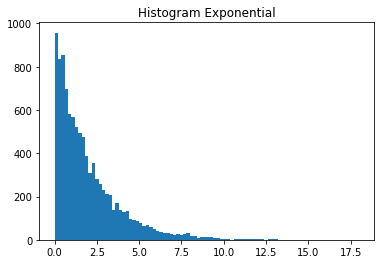

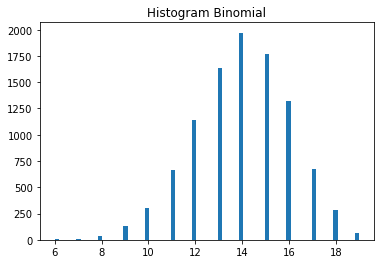

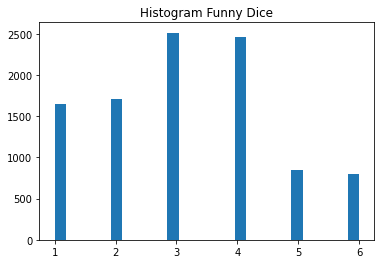

In [6]:
numberSimulations=10000
exponentialSamples=exponentialRV(1, 2,numberSimulations)
binomialSamples=binomial(1, 0.7,20,numberSimulations)
funnyDiceSamples=funnyDiceRV(1, numberSimulations)

#np.histogram(exponentialSamples)
plt.hist(exponentialSamples, bins='auto')
plt.title("Histogram Exponential")
plt.show()
plt.hist(binomialSamples, bins='auto')
plt.title("Histogram Binomial")
plt.show()
plt.hist(funnyDiceSamples, bins='auto')
plt.title("Histogram Funny Dice")
plt.show()

For the exponential random variable, you should then test the empirical expectation and variance of the random variables you generated. Assume you have generated random variables $X_1,X_2,X_3,\dots,X_n$ calculate the empirical mean 
\begin{equation}
\hat{\text{ }\mu} =\frac{\sum^n_{i=1} X_i}{n}
\end{equation}
and the empirical variance 
\begin{equation}
\hat{\text{ }\sigma} = \frac{\sum^n_{i=1}(X_i - \hat{\mu})^2}{n}
\end{equation}
Use 10000 simulations. Is the result of your calculation in line with what you expect? Why?

In [7]:
print(np.mean(exponentialSamples), np.var(exponentialSamples))

1.9770938809848277 3.848581029324636


In [8]:
#Here you add the few lines of code for your calculations
mean = sum(exponentialSamples) / len(exponentialSamples)
print("the empirical mean is: " , mean)

var = sum(
    np.square([(x - mean) for x in exponentialSamples])
    ) / len(exponentialSamples)
print("the empirical variance is: " , var)

the empirical mean is:  1.9770938809848242
the empirical variance is:  3.8485810293246394


Explanation: <br>
The result of my calculation **IS** in line with what I expected. <br>
The parameter of the `exponentialSamples()` functions is given to us `mean = 2`($=\frac{1}{\frac{1}{2}}=\frac{1}{λ}$). The empirical mean that we calculated from 10000 simulations is $\approx 1.977094$, which is very close to `2`. <br>
The `variance` of the exponential distribution is $\frac{1}{λ^2}$$=\frac{1}{(\frac{1}{2})^2} = \frac{1}{\frac{1}{4}}=$ `4`. The empirical variance that we calculated from 10000 simulations is $\approx 3.848581$, is also very close to `4`. <br>
(See below for proof for Expected Value and Variance of the exponential random variable)


In [9]:
# check binomial
print(20*0.7, 20*0.7*(1-0.7)) # E(X)=np, Var(x)=np(1-p)
print(np.mean(binomialSamples), np.var(binomialSamples))

# check funnyDice
funny_mean = (1/6)*1+(1/6)*2+(1/4)*3+(1/4)*4+(1/12)*5+(1/12)*6
funny_var = (1-funny_mean)**2*(1/6)+(2-funny_mean)**2*(1/6)+(3-funny_mean)**2*(1/4)+(4-funny_mean)**2*(1/4)+(5-funny_mean)**2*(1/12)+(6-funny_mean)**2*(1/12)
print(funny_mean, funny_var) 
print(np.mean(funnyDiceSamples), np.var(funnyDiceSamples))

14.0 4.200000000000001
13.978593578073422 4.136982997470011
3.1666666666666665 2.138888888888889
3.1537 2.1150763100000005



---
*scratch paper: deriving inverse function*<br>
exponential **pdf**: $$f(x) =\lambda e^{-\lambda x}, x>0$$ 
find cdf
$$F(x) = \int_{-∞}^{x}f(x) \, dx $$
$$F(x) = \int_{0}^{x}\lambda e^{-\lambda x} \, = -e^{-\lambda x}]^{x}_0 \, = -e^{-\lambda x}-(-1)$$
$$F(x) = 1-e^{-\lambda x} , \,x>0$$
derive the **inverse** of the cdf:
$$e^{-\lambda x} = 1- y$$
$$-\lambda x = ln(1-y)$$
$$ x = -\frac{1}{\lambda}ln(1-y)$$
so
$$ F^{-1}(x) = -\frac{1}{\lambda}ln(1-x)$$
the mean of $Exp(\lambda)$ is $E(X) = \frac{1}{\lambda}$ <br>
<br>

---

Binomial **pmf**: $X\sim Bin(m \, \text{trials}, p)$ 
$$P(X=k) = \binom{m}{k}p^k(1-p)^{m-k}$$
**cdf**: $$F_X(x) = P(X\leq x) = \sum_{k=0}^{x} \binom{m}{k}p^k(1-p)^{m-k}$$



---

*derivation of the mean and variance of an Exponential rv*:
$$E(X) =  \int_{-∞}^{∞}xf(x) dx = \int_{0}^{∞}x\lambda e^{-\lambda x} dx $$
integrating by parts $u = x \, , dv = \lambda e^{-\lambda x} (∫ u dv = uv - ∫ v du.)$
$$E(X) = x (-e^{-\lambda x}) \bigg| ^\infty_0 - \int_{0}^{∞}(-e^{-\lambda x}) dx$$
$\hspace{60mm}= (0-0) + [\frac{1}{-\lambda}e^{-\lambda x}]^{∞}_0 = \frac{1}{-\lambda} (0-1) = \frac{1}{\lambda}$ <br>

$Var(x) = E[X^2] - [E(X)]^2$ <br>

$$E[X^2] =  \int_{-∞}^{∞}x^2f(x) dx = \int_{0}^{∞}x^2\lambda e^{-\lambda x} dx $$
integrating by parts $u = -x^2, dv=-\lambda e^{-\lambda x}$
$$E[X^2] = -x^2e^{-\lambda x}\bigg| ^\infty_0 - \int_{0}^{∞}e^{-\lambda x} \neg 2x dx$$
$\hspace{61mm}= (0-0) + 2 \int_{0}^{∞}e^{-\lambda x}x dx$
$\hspace{61mm}= (0-0) + 2 \frac{1}{\lambda}\lambda \int_{0}^{∞}e^{-\lambda x}x dx$
$\hspace{61mm}=2 \frac{1}{\lambda}E(X)$
$$E[X^2] = \frac{2}{\lambda^2}$$
$Var(x) = E[X^2] - [E(X)]^2 = \frac{2}{\lambda^2} - (\frac{1}{\lambda})^2 = \frac{1}{\lambda^2}$